In [70]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()

import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
# set_nb_theme('onedork')

<Figure size 640x480 with 0 Axes>

In [ ]:
<h2 style="color:black; background:lightgreen;"> READ DATA </h2>

In [ ]:
<font color='green'>toi yeu ban</font>

<h2 style="color:black; background:lightgreen;"> Read data </h2>

In [54]:
df = pd.read_csv("world_population.csv")
df

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


<h2 style="color:black; background:lightgreen;"> Data cleaning </h2>

In [55]:
print(f"Shape of DataFrame:\n {df.shape}")
print(df.columns.values)

Shape of DataFrame:
 (234, 17)
['Rank' 'CCA3' 'Country/Territory' 'Capital' 'Continent' '2022 Population'
 '2020 Population' '2015 Population' '2010 Population' '2000 Population'
 '1990 Population' '1980 Population' '1970 Population' 'Area (km²)'
 'Density (per km²)' 'Growth Rate' 'World Population Percentage']


In [56]:
for column in df.columns:
    print(f"{column} ---> {df[column].nunique()}")

Rank ---> 234
CCA3 ---> 234
Country/Territory ---> 234
Capital ---> 234
Continent ---> 6
2022 Population ---> 234
2020 Population ---> 234
2015 Population ---> 234
2010 Population ---> 234
2000 Population ---> 234
1990 Population ---> 234
1980 Population ---> 234
1970 Population ---> 234
Area (km²) ---> 233
Density (per km²) ---> 234
Growth Rate ---> 180
World Population Percentage ---> 70


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [58]:
df.describe().T.sort_values("50%", ascending = False).style.background_gradient(cmap = "RdPu")\
    .bar(subset = ["mean"], color = "red").bar(subset = ["max"], color = "green")

,count,mean,std,min,25%,50%,75%,max
2022 Population,234.000000,34074414.709402,136766424.804763,510.000000,419738.500000,5559944.500000,22476504.750000,1425887337.000000
2020 Population,234.000000,33501070.952991,135589876.924439,520.000000,415284.500000,5493074.500000,21447979.500000,1424929781.000000
2015 Population,234.000000,31729956.243590,130404992.751760,564.000000,404676.000000,5307400.000000,19730853.750000,1393715448.000000
2010 Population,234.000000,29845235.034188,124218487.632998,596.000000,393149.000000,4942770.500000,19159567.500000,1348191368.000000
2000 Population,234.000000,26269468.816239,111698206.719070,651.000000,327242.000000,4292907.000000,15762301.000000,1264099069.000000
1990 Population,234.000000,22710220.790598,97832173.346751,700.000000,264115.750000,3825409.500000,11869231.000000,1153704252.000000
1980 Population,234.000000,18984616.970085,81785186.084201,733.000000,229614.250000,3141145.500000,9826053.750000,982372466.000000
1970 Population,234.000000,15786908.807692,67795091.643236,752.000000,155997.000000,2604830.000000,8817329.000000,822534450.000000
Area (km²),234.000000,581449.384615,1761840.864063,1.000000,2650.000000,81199.500000,430425.750000,17098242.000000
Rank,234.000000,117.500000,67.694165,1.000000,59.250000,117.500000,175.750000,234.000000


### Check NaN

In [59]:
for column in df.columns:
    print(column)
    print(f"{df[column].isnull().value_counts()}\n")

Rank
Rank
False    234
Name: count, dtype: int64

CCA3
CCA3
False    234
Name: count, dtype: int64

Country/Territory
Country/Territory
False    234
Name: count, dtype: int64

Capital
Capital
False    234
Name: count, dtype: int64

Continent
Continent
False    234
Name: count, dtype: int64

2022 Population
2022 Population
False    234
Name: count, dtype: int64

2020 Population
2020 Population
False    234
Name: count, dtype: int64

2015 Population
2015 Population
False    234
Name: count, dtype: int64

2010 Population
2010 Population
False    234
Name: count, dtype: int64

2000 Population
2000 Population
False    234
Name: count, dtype: int64

1990 Population
1990 Population
False    234
Name: count, dtype: int64

1980 Population
1980 Population
False    234
Name: count, dtype: int64

1970 Population
1970 Population
False    234
Name: count, dtype: int64

Area (km²)
Area (km²)
False    234
Name: count, dtype: int64

Density (per km²)
Density (per km²)
False    234
Name: count, dtype: i

In [60]:
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

##### => There is no NaN values in this CSV

### Check duplicated data

In [61]:
df.duplicated().sum()

0

##### => There is no duplicated data in this CSV

### Drop unnecessary column and rename column name

In [62]:
df.drop("CCA3", axis = 1, inplace = True)
df.rename({"Country/Territory":"Country", 
          '2022 Population': 2022,
          '2020 Population': 2020,
          '2015 Population': 2015, 
          '2010 Population': 2010, 
          '2000 Population': 2000, 
          '1990 Population': 1990, 
          '1980 Population': 1980, 
          '1970 Population': 1970}, axis = 1, inplace = True)
df

,Rank,Country,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


<h2 style = "color:black; background:lightgreen"> Data formatting </h2>

In [42]:
for column in df.columns[4:12]:
    df[column] = df[column].astype(int)

<h2 style = "color:black; background:lightgreen"> Data visualization </h2>

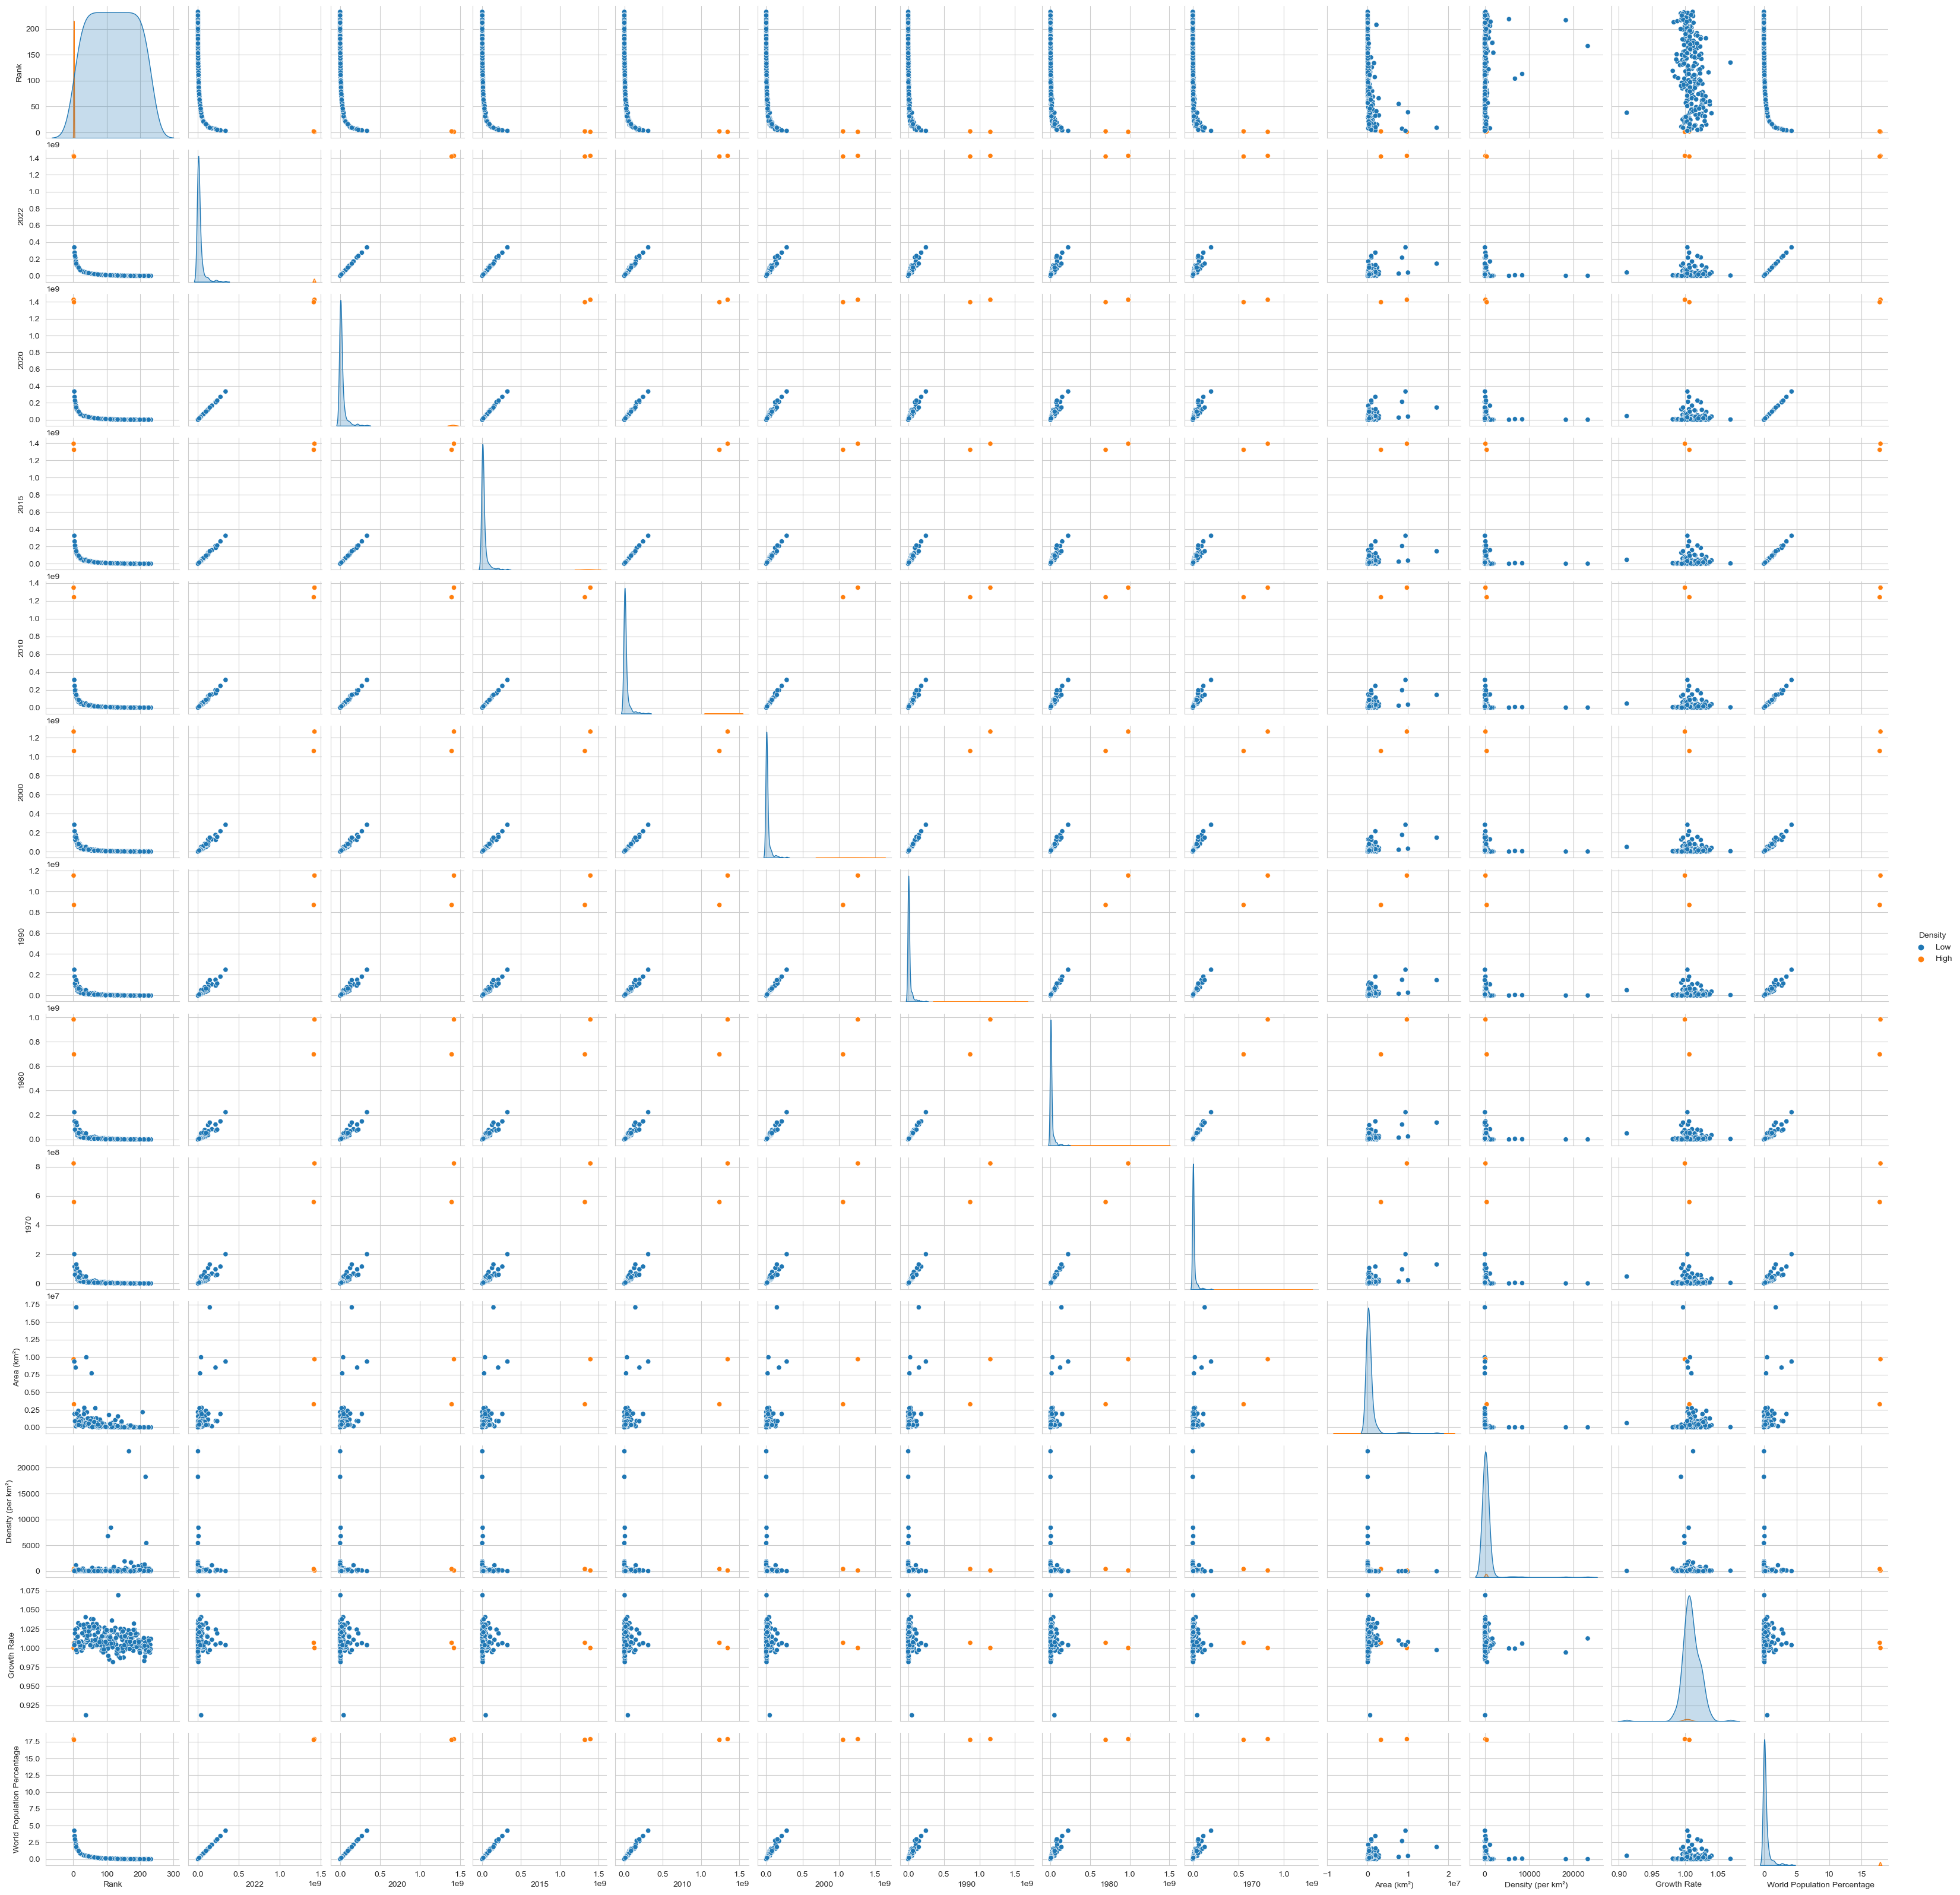

In [15]:
# Set a new column is "Density" to use hue for pairplot
bins = np.linspace(min(df[2022]), max(df[2022]), 3)
df["Density"] = pd.cut(df[2022], bins, labels = ["Low", "High"])

sns.pairplot(data = df, hue = "Density")

plt.tight_layout
plt.show()

### 2 countries with the largest population (China and India)

In [43]:
df_china_india = df.set_index("Country")
df_china_india = df_china_india.loc[["China", "India"],2022:1970]
df_china_india = df_china_india.transpose()
df_china_india.rename_axis("Years", axis = 1, inplace = True)
df_china_india

Years,China,India
2022,1425887337,1417173173
2020,1424929781,1396387127
2015,1393715448,1322866505
2010,1348191368,1240613620
2000,1264099069,1059633675
1990,1153704252,870452165
1980,982372466,696828385
1970,822534450,557501301


In [44]:
fig = go.Figure()
fig.add_trace(go.Bar(x = df_china_india.index, y = df_china_india["China"], 
                     name = "China", textfont = dict(size = 100), 
                     text = round(df_china_india["China"] /\
                                 (df_china_india["China"].sum()) * 100, 2).apply(lambda x: f"{x}%"),
                     textposition = "outside", textfont_size = 100
                    
                    )
             )
fig.add_trace(go.Bar(x = df_china_india.index, y = df_china_india["India"], 
                     name = "India", textfont = dict(size = 100), 
                     text = round(df_china_india["India"] /\
                                 (df_china_india["India"].sum()) * 100, 2).apply(lambda x: f"{x}%"),
                     textposition = "outside", marker_color = "rgb(50, 80, 110)", 
                     textfont_size = 100
                    
                    )
             )
fig.update_traces(hoverinfo = "x+y+name+text")
fig.update_layout(title = "CHINA & INDIA (POPULATION)", titlefont = dict(size = 27), 
                  title_x = 0.5, title_y = 0.99, height = 600, width = 900,
                  
                  xaxis = dict(title = "Years", titlefont_size = 19, 
                              tickfont_size = 14.2, range = [1967, 2025], 
                              tickvals = [1970, 1980, 1990, 2000, 2010, 2015, 2020, 2022], 
                              tickmode = "array", tickangle = 45, ticks = "outside", showgrid = True), 
                  
                  yaxis = dict(title = "Numbers of population", titlefont_size = 19,
                              tickfont_size = 13, 
                              ticktext = [0, "200M", "400M", "600M", "800M"],
                              tickvals = [0, 200_000_000, 400_000_000, 6 * (10 ** 8), 
                                         8 * (10 ** 8), 1 * (10 ** 9), 1.2 * (10 ** 9), 
                                         1.4 * (10 ** 9)]), 
                  legend = dict(orientation = "h", xanchor = "left", yanchor = "top",
                               x = 0.1, y = 1, bgcolor = "White", 
                               bordercolor = "Black", borderwidth = 1.5), 
                  font_size = 17, showlegend = True,
                  hovermode = "x", 
                  paper_bgcolor = "rgb(220, 220, 220)", plot_bgcolor = "rgb(220, 220, 220)"
                 
                 )
fig.add_annotation(text = "Increase (1970 - 2022)", showarrow = True, arrowhead = 2, arrowwidth = 2, 
                   x = 1980, y = 1.1*(10 ** 9), font_size = 16, 
                   hovertext = "It' s increasing from 1970 - 2022")

# fig.update_xaxes(range=[1968, 2026])
fig.show()

In [45]:
fig = go.Figure()
fig.add_trace(go.Bar(x = df_china_india.index, y = df_china_india["China"], 
                     name = "China", textposition = "outside",
                     text = round(df_china_india["China"] /\
                                  (df_china_india["China"].sum()) * 100, 2).apply(lambda x: f"{x}%"), 
                     textfont = dict(size = 100)
                     ))

fig.add_trace(go.Bar(x = df_china_india.index, y = df_china_india["India"],
                     name = "India", marker_color = "rgb(56, 83, 109)", 
                     text = round(df_china_india["India"] /\
                                  (df_china_india["India"].sum()) * 100, 2).apply(lambda x: f"{x}%"), 
                     textposition = "outside", textfont = dict(size = 100)))

fig.update_layout(hovermode = "x", title = "CHINA & INDIA (POPULATION)", titlefont = dict(size = 27), 
                 title_x = 0.5, title_y = 0.93, width = 950, height = 650,
                 legend = dict(orientation = "h", 
                              xanchor = "left", x = 0.05, yanchor = "top", y = 1, font_size = 15, 
                              bgcolor = "White", bordercolor = "Black", borderwidth = 1.5),
                 showlegend = True, 
                 
                 xaxis = dict(title = "Years", titlefont = dict(size = 18), tickfont = dict(size = 14), 
                             tickmode = "array", tickangle = 45, ticks = "outside", showgrid = True, 
                             tickvals  = [1970, 1980, 1990, 2000, 2010, 2015, 2020, 2022]),
                  
                  
                 yaxis = dict(title = "Numbers of population", titlefont = dict(size = 20),
                             tickfont = dict(size = 14), ticktext = [0, "200M", "400M",
                                                                     "600M", "800M"], 
                             tickvals = [0, 200_000_000, 400_000_000, 600_000_000,
                                        800_000_000, 1_000_000_000, 1_200_000_000, 1_400_000_000]),
                 paper_bgcolor = "rgb(220, 220, 220)", plot_bgcolor = "rgb(220, 220, 220)")


fig.update_traces(hoverinfo = "x+y+name+text")
fig.add_annotation(x = 1982, y = 1_100_000_000, text = "Increase (1970 - 2000)",
                  font = dict(size = 15), hovertext = "population increased evenly 1970 - 2000",
                  arrowwidth = 2, arrowhead = 2, showarrow = True)

fig.update_xaxes(range=[1968, 2026])

# plt.tight_layout()
fig.show()

##### => There is increasing evenly from 1970 to 2000, and then it leveled off and slowly increased

##### => China has a largest pulation than India, that is the reason why China is ranked 1st about population

In [46]:
df_china_india.describe()

Years,China,India
count,8.000000e+00,8.000000e+00
mean,1.226929e+09,1.070182e+09
std,2.240527e+08,3.299235e+08
min,8.225344e+08,5.575013e+08
25%,1.110871e+09,8.270462e+08
50%,1.306145e+09,1.150124e+09
75%,1.401519e+09,1.341247e+09
max,1.425887e+09,1.417173e+09


<Axes: >

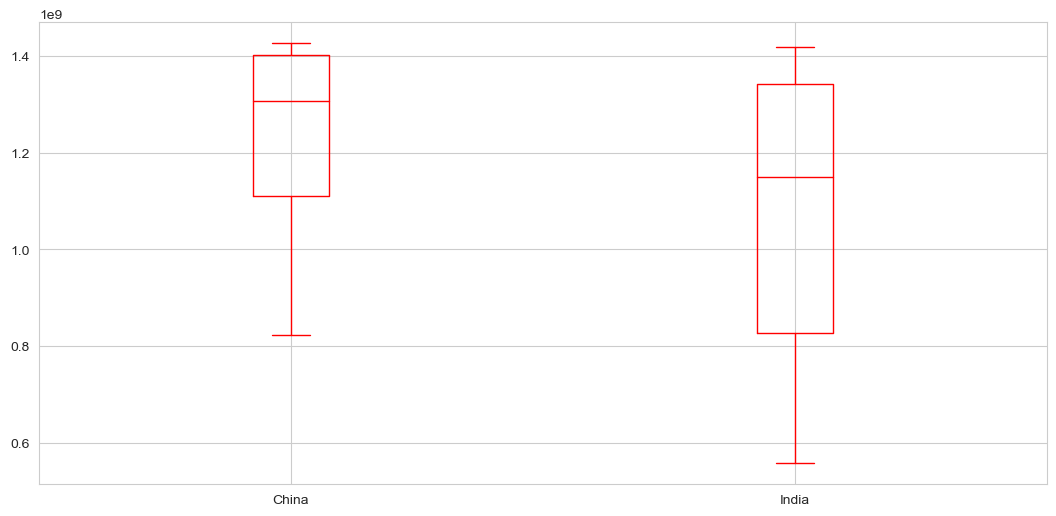

In [47]:
df_china_india.plot(kind = "box", color = 'red', figsize = (13, 6), vert = True)

### The population of the 3 largest economies in the world (USA, China, Japan)

In [48]:
df_economic = df.set_index("Country")
df_economic = df_economic.loc[:, 2022:1970].transpose()
df_economic = df_economic.loc[:, ["United States", "China", "Japan"]].reset_index()
df_economic.rename({"index":"Years"}, axis = 1, inplace = True)
df_economic.rename_axis(None, axis = 1, inplace = True)
df_economic.style.background_gradient(cmap = "YlOrRd").bar(subset = ["United States"], color = "darkblue")\
    .bar(subset = ["Japan"], color = "green")

,Years,United States,China,Japan
0,2022,338289857,1425887337,123951692
1,2020,335942003,1424929781,125244761
2,2015,324607776,1393715448,127250933
3,2010,311182845,1348191368,128105431
4,2000,282398554,1264099069,126803861
5,1990,248083732,1153704252,123686321
6,1980,223140018,982372466,117624196
7,1970,200328340,822534450,105416839


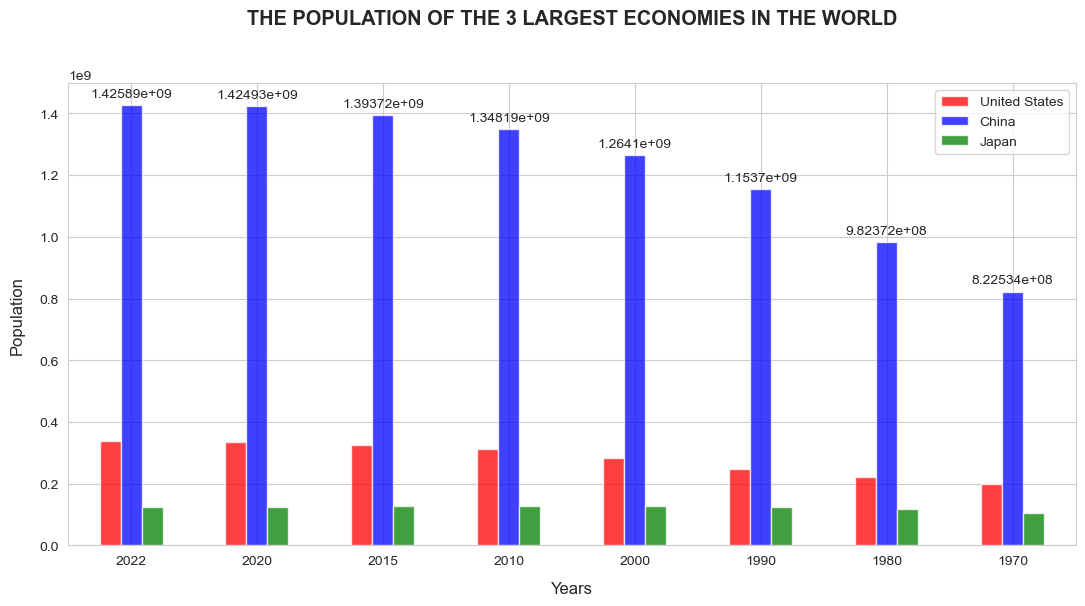

In [49]:
ax = df_economic.plot(kind = "bar", x = "Years", y =["United States", "China", "Japan"], figsize = (13, 6), 
                 color = ["red", "blue", "green"],alpha = 0.75)
 
plt.title("THE POPULATION OF THE 3 LARGEST ECONOMIES IN THE WORLD", y = 1.11, fontsize = "x-large",
         fontweight = "bold")


plt.xlabel("Years", fontsize = "large", labelpad = 10)
plt.ylabel("Population", fontsize = "large", labelpad = 10)
plt.xticks(rotation = 0)

ax.bar_label(ax.containers[1], padding = 3.5)
# plt.tight_layout()
plt.show()

##### => sorry, i don't know how to edit column 1970 in first after 0 axes. It's true if start at 1970 and finished at 2022. If somebody have the best way to solve this problems, pls show me. 

### World population percentage based on Continent

In [64]:
# Set new column is Total population from 1970 to 2022
df["Total"] = df.loc[:, 2022:1970].sum(axis = 1, skipna = True)

In [72]:
df_continent = df.groupby(["Continent"])[df.columns].mean(numeric_only=True)
df_continent.style.background_gradient(cmap = "Purples")

,Rank,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Total
Continent,,,,,,,,,,,,,,
Africa,92.157895,25030367.228070,23871435.263158,21071972.666667,18512773.192982,14367474.245614,11195625.070175,8448006.614035,6411304.350877,531894.087719,125.047646,1.021244,0.313509,128908958.631579
Asia,77.560000,94427665.480000,93261730.700000,89165003.640000,84400826.540000,74701792.080000,64211271.540000,52706684.560000,42898125.800000,642762.820000,1025.024136,1.009384,1.183800,595773100.340000
Europe,124.500000,14862950.760000,14915843.920000,14830712.160000,14712278.680000,14521868.460000,14406415.940000,13850543.180000,13118479.820000,460208.220000,663.324742,1.002256,0.186600,115219092.920000
North America,160.925000,15007403.400000,14855914.825000,14259596.250000,13568016.275000,12151739.600000,10531660.625000,9207334.025000,7885865.150000,606104.450000,272.761758,1.004175,0.187750,97467530.150000
Oceania,188.521739,1958198.000000,1910148.956522,1756664.478261,1613163.652174,1357512.086957,1162774.869565,996532.173913,846968.260870,370220.913043,132.543065,1.007383,0.023913,11601962.478261
South America,97.571429,31201186.285714,30823574.500000,29509599.714286,28077017.857143,24973877.285714,21224743.928571,17270643.285714,13781939.714286,1273813.000000,20.971979,1.007957,0.391429,196862582.571429


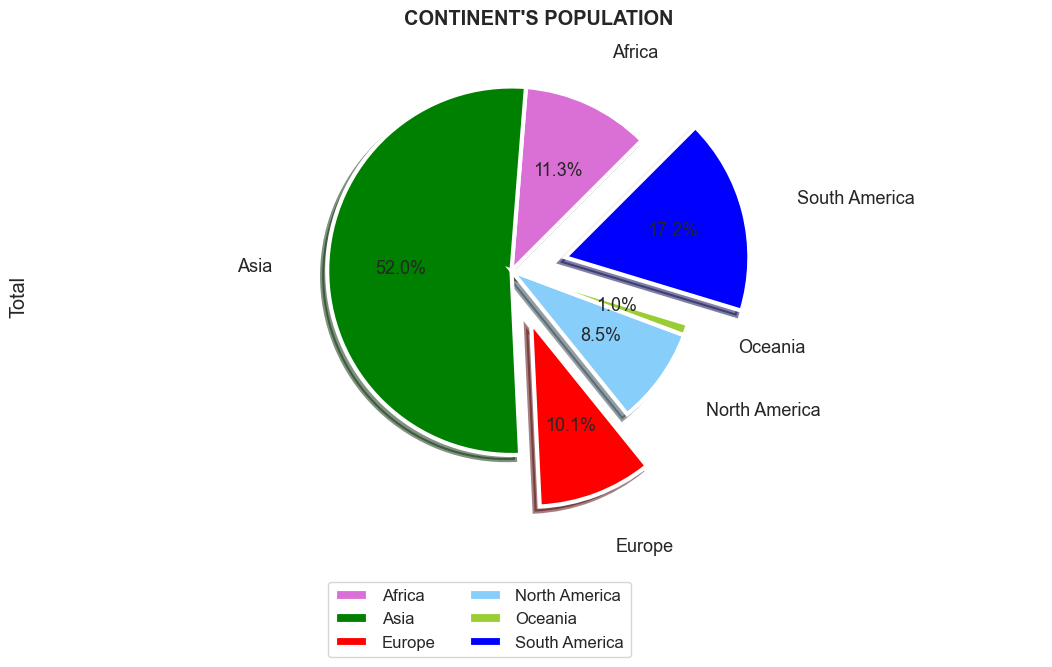

In [73]:
df_continent.plot(kind = "pie", x = df_continent.index, y = "Total", figsize = (13, 6),
                 shadow = True, autopct = "%.1f%%", textprops = {"fontsize":13}, 
                 labels = df_continent.index, labeldistance = 1.3,
                 startangle = 45, colors = ["orchid", "green","red", "lightskyblue", "yellowgreen",
                                           "blue"],
                 explode = [0, 0, 0.3, 0, 0, 0.3], rotatelabels = False, counterclock = True, 
                 wedgeprops = {"edgecolor":"white", "linewidth":3})

plt.title("CONTINENT'S POPULATION", fontsize = "x-large", fontweight = "bold", y = 1.07)
plt.ylabel("Total", fontsize = "x-large")
plt.legend(df_continent.index, loc = "best", ncol = 2, bbox_to_anchor = (0.6, -0.1), fontsize = "large")

plt.axis("equal")
plt.show()

##### => Of course, Asis is the largest Continent about population, because China and India belongs to this Continent

### World population percentage 2020 and 2022 base on Continent

In [76]:
df_2020 = df.groupby(["Continent"], as_index = False)[2020].sum()
df_2022 = df.groupby(["Continent"], as_index = False)[2022].sum()

fig = make_subplots(rows = 1, cols = 2, specs = [[{"type":"domain"}, {"type":"domain"}]])
fig.add_trace(go.Pie(values = df_2020[2020], labels = df_2020["Continent"]), 1, 1)
fig.add_trace(go.Pie(values = df_2022[2022], labels = df_2022["Continent"]), 1, 2)

fig.update_traces(hole = 0.3, textposition = "inside", hoverinfo = "value+percent+label",
                 textinfo = "percent+label", insidetextorientation = "horizontal")
fig.update_layout(title = "WORLD POPULATION PCT 2020 AND 2020", title_x = 0.5, title_font = dict(size = 20))

fig.add_annotation(text = "2020", showarrow = False, x = 0.185, font_size = 24)
fig.add_annotation(text = "2022", showarrow = False, x = 0.815, font_size = 24)

fig.show()

##### => Continents have an increase of 2% - 5% of the population.

### Relationship (Area, Density, Growth rate, Percentage)

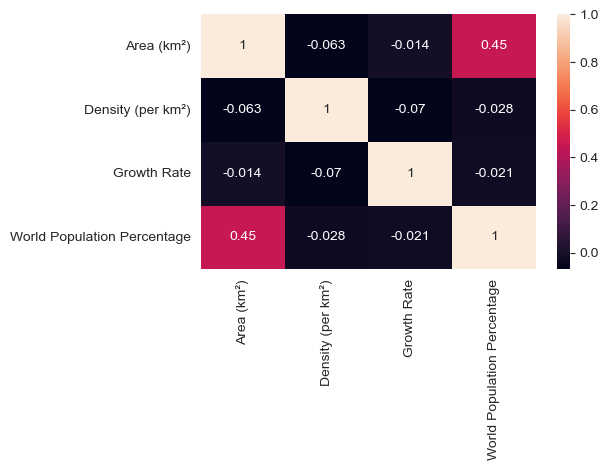

In [77]:
df_relationship = df[["Area (km²)", "Density (per km²)", 
                     "Growth Rate", "World Population Percentage"]].corr()
sns.heatmap(data = df_relationship, annot = True)
plt.tight_layout()
plt.show()

### Choropleth map

In [391]:
fig = px.choropleth(df, locations = "Country", 
                    locationmode = "country names", title = "Growth Rate",
                   color = "Growth Rate", color_continuous_scale = "Viridis")
fig.show()

In [418]:
fig = px.choropleth(df, locations = "Country", 
                    locationmode = "country names", title = "Area (km²)",
                   color = "Area (km²)")
fig.show()